# House Price Prediction using Machine Learning


## 1. Problem Statement
The objective of this project is to predict house prices using supervised
machine learning techniques based on housing features from the Kaggle dataset.



## 2. Import Libraries


## 3. Load Dataset


In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df.shape

(1460, 81)

## 4. Exploratory Data Analysis (EDA)


In [2]:
df.columns[-1]


'SalePrice'

In [3]:
df.to_csv('train.csv', index=False)


In [4]:
import os
os.listdir()


['.config', 'drive', 'train.csv.xlsx', 'train.csv', 'sample_data']

In [5]:
import pandas as pd

df = pd.read_csv('train.csv')
df.shape


(1460, 81)

In [6]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df['SalePrice'].describe()


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


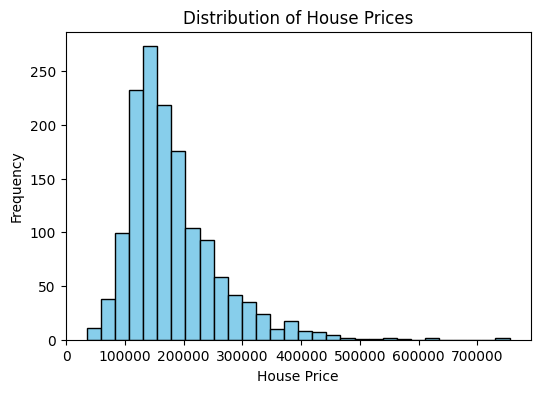

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

## 5. Data Cleaning and Preprocessing


In [10]:
missing = df.isnull().sum().sort_values(ascending=False)
missing.head(15)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [11]:
'Alley' in df.columns


True

In [12]:
df.isnull().sum().sort_values(ascending=False).head(10)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [13]:
df = df.drop(columns=['Alley'], errors='ignore')


In [14]:
'Alley' in df.columns


False

In [15]:
df.isnull().sum().sort_values(ascending=False).head(10)


,0
PoolQC,1453
MiscFeature,1406
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81
GarageYrBlt,81


In [16]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Fence', 'MasVnrType', 'FireplaceQu']
df = df.drop(columns=cols_to_drop, errors='ignore')


In [17]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())


In [18]:
garage_cols = ['GarageQual', 'GarageFinish', 'GarageType']
for col in garage_cols:
    df[col] = df[col].fillna('None')


In [19]:
df.isnull().sum().sort_values(ascending=False).head(10)


,0
GarageCond,81
BsmtFinType2,38
BsmtExposure,38
BsmtQual,37
BsmtFinType1,37
BsmtCond,37
MasVnrArea,8
Electrical,1
Id,0
MSSubClass,0


In [20]:
bsmt_cols = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2'
]

for col in bsmt_cols:
    df[col] = df[col].fillna('None')


In [21]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())


In [22]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna('None')


In [23]:
df.isnull().sum().sort_values(ascending=False).head(10)


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


## 6. Feature and Target Selection


In [24]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X = pd.get_dummies(X, drop_first=True) # Move encoding before train_test_split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 7. Model Training and Evaluation


In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### 7.1 Linear Regression (Baseline Model)


In [27]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)

r2


0.6425588728966065

### 7.2 Random Forest Regressor (Final Model)


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [29]:
from sklearn.metrics import r2_score

y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

r2_rf


0.8914189204539369

## 8. Model Visualization


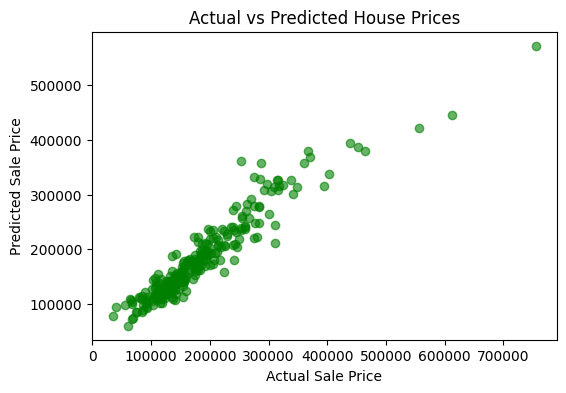

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

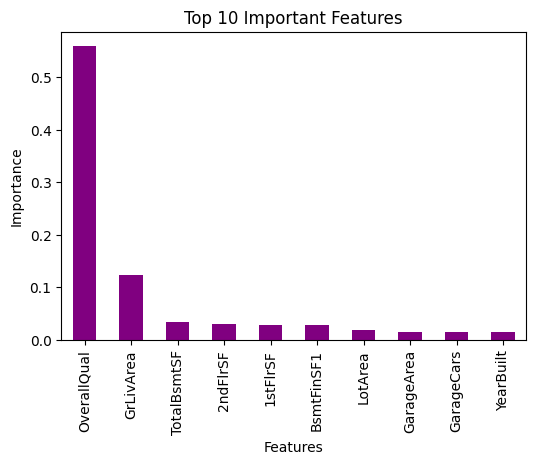

In [31]:
import matplotlib.pyplot as plt
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)[:10]

plt.figure(figsize=(6,4))
feature_importance.plot(kind='bar', color='purple')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Important Features')
plt.show()

## 9. Prediction on New Data


In [32]:
sample_house_india = {
    'MSSubClass': 20,        # 1-story independent house
    'LotFrontage': 50,       # 50 ft road frontage
    'LotArea': 2400,         # plot size in sq ft
    'OverallQual': 6,        # good construction quality
    'OverallCond': 5,        # average condition
    'YearBuilt': 2012,       # year of construction
    'TotalBsmtSF': 0,        # no basement (common in India)
    'GrLivArea': 1400,       # built-up area
    'FullBath': 2,           # bathrooms
    'BedroomAbvGr': 3,       # bedrooms
    'KitchenAbvGr': 1,       # kitchen
    'GarageCars': 1,         # car parking
    'GarageArea': 250        # parking area
}


In [33]:
sample_df = pd.DataFrame([sample_house_india])


In [34]:
sample_df = pd.get_dummies(sample_df)


In [35]:
sample_df = sample_df.reindex(columns=X.columns, fill_value=0)


In [36]:
predicted_price = rf.predict(sample_df)

print(f"Predicted House Price (USD): ${predicted_price[0]:,.2f}")


Predicted House Price (USD): $115,112.26


In [37]:
usd_to_inr = 83  # approx conversion
price_inr = predicted_price[0] * usd_to_inr

print(f"Predicted House Price (INR): ₹{price_inr:,.0f}")


Predicted House Price (INR): ₹9,554,318


## 10. Conclusion
The Random Forest model achieved a high R² score, demonstrating good predictive
performance. This project shows the complete end-to-end machine learning pipeline.
